In [1]:
import glob

In [2]:
ls ../reporters/*coutt*

../reporters/SvdB13a1-1-Tomo-120hAA-hGstrlds10-19052018-ChiSB43_cbc_trimmed_reporters.coutt.tsv
../reporters/SvdB13a1-2-Tomo-120hAA-hGstrlds79-19052018-ChiSB43_cbc_trimmed_reporters.coutt.tsv
../reporters/SvdB13a1-3-Tomo-72hAA-hGstrlds43-56-17052018-Chi_cbc_trimmed_reporters.coutt.tsv


In [3]:
path = '/Users/anna/Dropbox/gastruloids/WritingPapers/code4figures/figHuman/'

# read files

In [4]:
tdfg1 = read_csv('../hG03-20umAP-72h-Chi/mG03_trim_star_spliced.coutt.tsv', sep = '\t', index_col=0)
tdfg2 = read_csv('../hG04-20umAP-72h-Chi/mG04_trim_star_spliced.coutt.tsv', sep = '\t', index_col=0)
rdf = read_csv('../reporters/SvdB13a1-3-Tomo-72hAA-hGstrlds43-56-17052018-Chi_cbc_trimmed_reporters.coutt.tsv', sep = '\t', index_col = 0)

# get barcodes for each sample

In [5]:
rdf.columns= [c.zfill(3) for c in rdf.columns]

In [6]:
rdfg1 = rdf[tdfg1.columns]
rdfg2 = rdf[tdfg2.columns]

In [7]:
dfg1 = pd.concat([tdfg1, rdfg1])
dfg2 = pd.concat([tdfg2, rdfg2])

In [8]:
ndfg1 = dfg1.sum().median()*dfg1/dfg1.sum()
ndfg2 = dfg2.sum().median()*dfg2/dfg2.sum()

In [9]:
reporters = list(rdf.index)

In [10]:
reporters

['pUnivDonx-H2B-tdTomato-PGK-Neo-hSOX17arms',
 'pUnivDon-H2B-mCerulean-PGK-Puro-hTrams',
 'SOX2-mCitrine-T2A-Bsd']

In [11]:
name_reporters = {'pUnivDonx-H2B-tdTomato-PGK-Neo-hSOX17arms': 'tdTomato',
                 'pUnivDon-H2B-mCerulean-PGK-Puro-hTrams': 'mCerulean',
                 'SOX2-mCitrine-T2A-Bsd': 'mCitrine'}

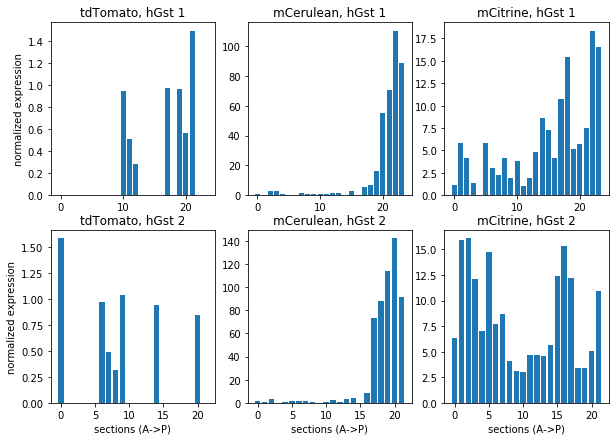

In [13]:
plt.figure(figsize=(10,7))
j = 0 
for i, df in enumerate([ndfg1, ndfg2]):
    for reporter in reporters:
        j += 1
        plt.subplot(2,3,j)
        plt.bar(range(len(df.columns)), df.loc[reporter])
        plt.title(name_reporters[reporter] + ', hGst '+ str(i+1))
        if j == 1 or j == 4:
            plt.ylabel('normalized expression')
        if j >= 4:
            plt.xlabel('sections (A->P)')
#plt.savefig(path + 'reporters_allmappedtogether_v1.pdf', bbox_inches = 'tight')           
plt.show()

In [23]:
pwd

'/Users/anna/Dropbox/gastruloids/data/hGstl-tomo/notebooks'

In [26]:
writer = pd.ExcelWriter('/Users/anna/Dropbox/gastruloids/WritingPapers/hGldPaper_Oct2019/source_data/fig2b.xlsx')

In [27]:
(ndfg1.loc[reporters].T).to_excel(writer, sheet_name = 'gastruloid 1')

In [28]:
(ndfg2.loc[reporters].T).to_excel(writer, sheet_name = 'gastruloid 2')

In [29]:
writer.close()